In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [49]:
data=pd.read_csv( 'ex2data1.txt',names=['Exam1','Exam2','score'])
data.head()

,Exam1,Exam2,score
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


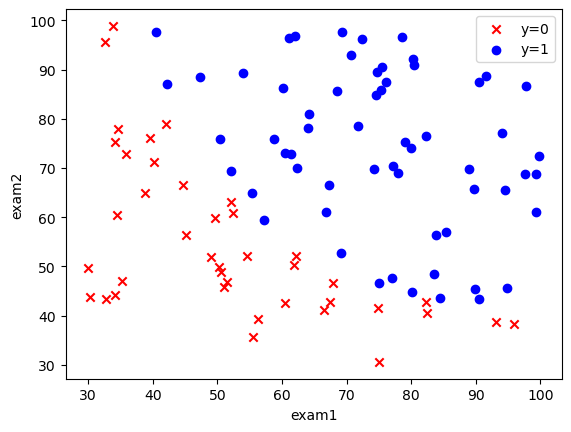

In [50]:
fig,ax = plt.subplots()
ax.scatter(data[data['score']==0]['Exam1'],data[data['score']==0]['Exam2'],c='r',marker='x',label='y=0')
ax.scatter(data[data['score']==1]['Exam1'],data[data['score']==1]['Exam2'],c='b',marker='o',label='y=1')
ax.legend()
ax.set(xlabel='exam1',ylabel='exam2')
plt.show()

In [51]:
def get_Xy(data):
    
    data.insert(0,'ones',1)
    X_ = data.iloc[:,0:-1]
    X = X_.values
    
    y_ = data.iloc[:,-1]
    y = y_.values.reshape(len(y_),1)
    
    return X,y

In [52]:
X,y = get_Xy(data)

In [53]:
def sigmoid(z):
    
    return 1 / (1 + np.exp(-z))

In [54]:
def costFunction(X,y,theta):
    
    A = sigmoid(X@theta)
    
    first = y * np.log(A)
    second = (1-y) * np.log(1-A)
    
    return -np.sum(first + second) / len(X)

In [55]:
theta = np.zeros((3,1))
theta.shape

(3, 1)

In [56]:
cost_init = costFunction(X,y,theta)
print(cost_init)

0.6931471805599453


In [57]:
def gradientDescent(X,y,theta,iters,alpha):
    m = len(X)
    costs = []
    
    for i in range(iters):
        A = sigmoid(X@theta)
        theta  = theta -(alpha/m)  * X.T @ (A - y)
        cost = costFunction(X,y,theta)
        costs.append(cost)
        if i % 1000 == 0:
            print(cost)
    return costs, theta

In [58]:
alpha = 0.004
iters=200000

In [59]:
costs,theta_final =  gradientDescent(X,y,theta,iters,alpha)

1.9886538578930084
3.0781700198641544
5.487009635362496
1.8519433661332625
2.9551289424083587
5.438688730769618
1.8046128090728508
2.831271577607404
5.3886531633606145
1.7561538117121571
2.706676380747814
5.3365673644957425
1.706280704769481
2.5818508519054273
5.281774101800353
1.6544129958512042
2.457843094743574
5.223255119969365
1.5996612097145555
2.3362477519414626
5.159653459570274
1.5408871901849082
2.21904920384689
5.089387088751128
1.4768567851081464
2.108268509053649
5.010845104587983
1.4064493632805861
2.005433890383271
4.9225734611717336
1.328804126125444
1.9109646054893648
4.82325748482661
1.2432202250971676
1.8235866121521394
4.711246821296763
1.1486277932139561
1.7397667362448004
4.583257400457349
1.0423478306006688
1.6525865746034034
4.430932868329269
0.9166267386002198
1.546533127655085
4.224624720512681
0.7330944584991134
3.9329492365965417
0.7522283517523697
1.2666696255093743
3.4489286724899495
2.296681323871993
0.6909998996878383
0.24482450820499038
0.86339752939300